In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris

%matplotlib inline

In [27]:
print(load_iris().keys())

df = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
df['target'] = load_iris().target
df['target_names'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df.head()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
cols = df.columns.tolist()[:-2]

In [25]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)

model.fit(train[cols], train['target_names'])

test['predicted_target_names'] = model.predict(test[cols])

In [26]:
(test['target_names'] == test['predicted_target_names']).sum() / len(test)

0.9777777777777777

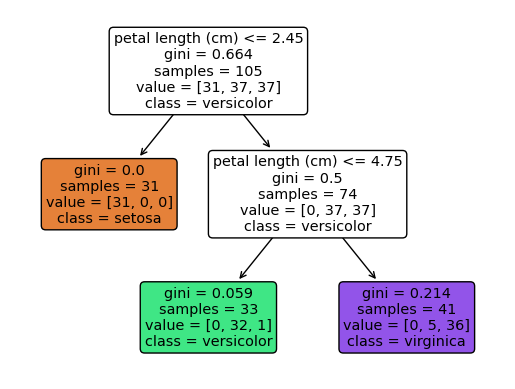

In [31]:
tree = plot_tree(model, feature_names=cols, class_names=load_iris().target_names, filled=True, rounded=True)